# 📊 Customer Retention Snapshot

> **To:** Marketing; Director; Team Leads, Team Members  
> **From:** BI Team — Garrett Schumacher  
> **Date:** 2025-08-17  
> **Subject:** Retention Snapshot — Cohort & Segmentation Analysis


As our ecommerce startup enters its second year, retention has emerged as the most critical growth lever. This snapshot evaluates **signup cohorts, first→second purchase conversion, loyalty tiers, and CLV by channel** to highlight early churn indicators and opportunities for marketing action.

**Key Findings**
- **Early Cohorts:** First→second conversion averages **~34%**, but drop-off by month 3 is steep (-14 pts), confirming the **30–60 day post-signup window** is the prime re-engagement period. 
   
- **Loyalty Program:** Only **Platinum tier (~49% repeat, ~1.7 orders lifetime)** shows ROI. Bronze (~0%) and Silver/Gold (~5–15%) are underperforming, raising questions about tier design.  
  
- **Channel Quality:** **Phone (58% HIGH CLV) and Website (43% HIGH CLV)** drive the highest-value customers, suggesting organic channels are strongest. However, Website is underperforming relative to scale and should be optimized (SEO + conversion).  
  
- **Email ROI:** Email campaigns deliver **40%+ HIGH CLV customers at modest cost**, making it a cost-effective channel to expand.  
  
- **Social Media:** Low volume and lowest CLV share (~33% HIGH). Best positioned as **awareness, not retention**.  

**Implications**
- Focus re-engagement campaigns on **first 60 days post-signup**.  
- Reassess loyalty tiers — Bronze is a “one-and-done” cohort needing redesign.  
- Double down on **Email** and optimize **Website acquisition funnel (SEO, on-site conversion)**.  
- Reframe **Social Media** spend as top-funnel, not retention.  

**Next Steps**  
- **Loyalty Program Discovery:** Evaluate tier effectiveness with a focus on **Bronze**, where repeat rates are near zero. Prioritize redesign of acquisition and progression strategy for this segment.  
  
- **Demographic Deep Dive:** Add **age cohorts × signup channel** to test hypotheses (e.g., Phone high-CLV skewing older). This will refine channel strategy and targeting. 
   
- **Behavioral Analysis:** Explore **cart abandonment × CLV buckets × region** to connect customer value with friction points in the funnel and uncover opportunities to improve conversion and retention.  

## Task & Purpose

The Marketing Team is focused on improving **customer retention**. Acquisition campaigns have been successful, but many customers make only one purchase and do not return. 

This report provides a **retention snapshot** to support the Marketing Team in shaping loyalty and re-engagement strategies.  

<details>
<summary>🎯 Objectives</summary>

- Break customers into signup cohorts (by month)
- Measure repeat purchase rate and first→second purchase conversion
- Assess retention by loyalty tier, signup channel, and CLV bucket
- Identify drop-off points and high-retention customer profiles
- Surface early churn indicators for marketing action

</details>

___

<details>
<summary>📤 Deliverables in Scope </summary>

- **Cohort-based retention view** to track repeat purchase rates over time  
- **First-to-second purchase conversion** as a leading churn indicator  
- **Retention segmentation** by loyalty tier and customer lifetime value (CLV)  
- **Signup channel analysis** to identify acquisition sources driving higher-value, retained customers  

</details>

___



## 🛠 Methods & Data Sources  

This retention snapshot is built from the **ecom_retailer.db** database, a simulated ecommerce dataset designed for reproducible cohort and segmentation analysis.  

<details>
<summary>📥 Data Sources</summary>

- **`customers`** – signup date, loyalty tier, acquisition channel, CLV bucket  
- **`orders`** – order dates, totals, and customer IDs  
- **`returns`** – return events and refunded amounts (optional churn signal)  
- **`product_catalog`** – product categories for optional spend analysis  

</details>

___

<details>
<summary>🧠 Analytical Approach </summary> 

1. **Cohort Definitions**  
   - Customers grouped by **signup month**.  
   - Cohorts tracked across subsequent months to measure repeat purchasing.  

2. **Retention Metrics**  
   - **Repeat Purchase Rate** – % of customers in a cohort making multiple purchases.  
   - **First → Second Purchase Conversion** – leading churn indicator.  
   - **Average Time Between Orders** – proxy for engagement frequency.  

3. **Segmentation Dimensions**  
   - **Loyalty Tier** – entry-level vs. premium segments.  
   - **Customer Lifetime Value (CLV) Bucket** – spend-based customer classification.  
   - **Signup Channel** – acquisition source (e.g., referral, paid ads, organic).  

</details>

___

<details>
<summary>📊 Key Metrics Overview</summary> 

This retention snapshot highlights the metrics most relevant to the Marketing Team’s objectives:  

1. **Repeat Purchase Rate by Cohort**  
   - Share of customers who place more than one order, grouped by signup month.  

2. **First → Second Purchase Conversion**  
   - Early churn signal: % of first-time buyers who return for a second purchase.  

3. **Average Time Between Orders**  
   - Typical number of days separating repeat purchases, showing engagement cadence.  

4. **Retention by Loyalty Tier**  
   - Comparative performance of Bronze, Silver, Gold, and Platinum program tiers.  

5. **CLV Distribution by Signup Channel**  
   - Which acquisition sources bring in higher-value customers with stronger retention.  

> 📌 *All metrics are derived from SQL cohort views and segmentation tables built in `build_02_retention_views.sql`.  


</details>

___

<details> 
<summary>🗂️ SQL Foundations</summary>

Retention cohort views and segmentation tables were managed with:  
- `build_02_retention_views.sql` – constructs cohort and segmentation views  
- `cleanup_02_retention_views.sql` – drops views before rebuild to ensure a clean pipeline  

These SQL views provide the backbone for the analyses and visualizations in the sections that follow.

</details>

___

<details> 
<summary>💽 Data Limitations</summary>

While this snapshot surfaces valuable insights, it’s important to note the following limitations of the dataset and methods:  

1. **Synthetic Data**  
   - The `ecom_retailer.db` dataset is simulated for training and portfolio storytelling.  
   - Although it mimics realistic e-commerce patterns, it may not capture all complexities of live customer behavior (e.g., seasonality noise, multi-channel attribution).  

2. **Cohort Granularity**  
   - Cohorts are defined at the **monthly signup level**.  
   - Weekly or daily cohorts could reveal more granular early-churn signals, but were not used to maintain readability.  

3. **Returns Data**  
   - Returns are available but were only lightly incorporated as a churn proxy.  
   - In real settings, returns can have diverse drivers (e.g., product quality vs. mis-picks) that need deeper segmentation.  

4. **Channel Attribution**  
   - Customers are tied to a **single signup channel**.  
   - In reality, multi-touch attribution can blur the impact of specific channels on retention.  

5. **Simplified Loyalty Program**  
   - Loyalty tiers (Bronze, Silver, Gold, Platinum) follow simplified rules.  
   - In production data, progression logic, bonus campaigns, and tier benefits would add more complexity to retention dynamics.  

> 📌 *These limitations don’t reduce the validity of the insights, but they should be considered when generalizing findings to real-world scenarios.*  

</details>

## 🗂 Data Setup & Environment Initialization  

This notebook connects directly to the **ecom_retailer.db** database to ensure all analyses are reproducible and consistent with the project pipeline.  

Key setup steps in the following cell:
- Import Python libraries for analysis and visualization  
- Detect the project root and locate the database file  
- Run `build_02_retention_views.sql` to create the cohort and segmentation views  
- Establish a reusable SQL query helper (`q()`) for pulling data into pandas  

This ensures the environment is clean, paths are anonymized for portability, and all views used in this report are rebuilt fresh.

In [1]:
# --- Imports & Setup ---
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.ticker as mtick
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# --- Plotting Style ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

# --- Database Connection & View Creation ---
# This cell checks for the required base tables and then runs the SQL script 
# to build the necessary views for this report. This makes the notebook more
# robust and the analysis reproducible.
roots_to_try = [Path("."), Path(".."), Path("../..")]
ROOT = None
for r in roots_to_try:
    # A more robust check for the project root
    if (r / "ecom_retailer.db").exists() and (r / "README.md").exists():
        ROOT = r.resolve()
        break

if ROOT is None:
    raise FileNotFoundError(
        "Couldn't find project root containing 'ecom_retailer.db'.\n"
        "Tip: run the notebook from within the project structure."
    )

DB_PATH = ROOT / "ecom_retailer.db"
SQL_BUILD = ROOT / "story_02_customer_retention_snapshot/sql_sessions/build_02_retention_views.sql"

# --- Anonymized Printing Helpers ---
from pathlib import Path

def redact_path(p: Path, label: str) -> str:
    """Return a stable placeholder for a path, ignoring the actual filesystem."""
    if p is None:
        return f"<{label}: unknown>"
    # Only show the last component and a label
    return f"<{label}: {p.name}>"

def redact_str(s: str) -> str:
    """Safety: strip home dir or drive letters if they sneak into strings."""
    # Add more patterns as needed
    home = str(Path.home())
    return s.replace(home, "<HOME>")

print(f"Project Root: {redact_path(ROOT, 'project_root')}")
print(f"Database Path: {redact_path(DB_PATH, 'db')}")

# Connect to the database and build views
try:
    conn = sqlite3.connect(str(DB_PATH))
    print("✅ Database connected successfully.")
except sqlite3.Error as e:
    print(f"❌ Database connection failed: {e}")
    raise

if SQL_BUILD.exists():
    print(f"Building views from: {redact_path(SQL_BUILD, 'sql_build')}")
    try:
        with open(SQL_BUILD, "r", encoding="utf-8") as f:
            conn.executescript(f.read())
        conn.commit()
        print("✅ Views created successfully.")
    except sqlite3.Error as e:
        print(f"❌ Failed to execute SQL build script: {e}")
        raise
else:
    print("⚠️ SQL build script not found. Assuming views already exist.")

# --- Query Helper ---
def q(sql: str, params=None) -> pd.DataFrame:
    """Runs a SQL query against the established DB connection and returns a pandas DataFrame."""
    try:
        return pd.read_sql_query(sql, conn, params=params)
    except Exception as e:
        print(f"An error occurred during query: {e}")
        return pd.DataFrame() # Return empty dataframe on error

Project Root: <project_root: dev_sql_stories>
Database Path: <db: ecom_retailer.db>
✅ Database connected successfully.
Building views from: <sql_build: build_02_retention_views.sql>
✅ Views created successfully.


## 🧼 Data Hygiene & Validation

All retention metrics in this snapshot are built from **SQL views** that normalize and filter the source tables.  
Key steps applied in SQL:

- Standardized categorical fields (`signup_channel`, `loyalty_tier`, `clv_bucket`) using `UPPER(TRIM(...))`  
- Excluded blank or null values for cohorts, channels, and tiers  
- Aggregated at the cohort level to remove duplicates and enforce consistent customer counts  
- Constrained rates (e.g., `retention_rate`, `first_to_second_conversion`) to the valid 0–1 range  

>In this notebook, we also ran **lightweight validation checks** (e.g., retention within 0–100%, cohort sizes reconcile, no blank categories) to confirm analysis outputs are reliable.

In [2]:
# === Validation Checklist for SQL views ===

checks = []
details = {}

def ok(name, cond, detail=""):
    checks.append((name, bool(cond)))
    if detail:
        details[name] = detail

def within01(series):
    s = pd.to_numeric(series, errors="coerce")
    return s.dropna().between(0, 1).all(), (s.min(skipna=True), s.max(skipna=True))

# 0) Utility: list existing views once
views = pd.read_sql_query("""
SELECT name, type 
FROM sqlite_master 
WHERE type IN ('view')
ORDER BY name;
""", conn)
view_names = set(views["name"].tolist())

# 1) Signup-based cohort grid
if "dash_retention_cohort_grid" in view_names:
    d = q("SELECT * FROM dash_retention_cohort_grid;")
    ok("CohortGrid: not empty", not d.empty, f"rows={len(d)}")
    if not d.empty:
        # required columns
        req = {"cohort_month","total_customers","months_since_signup","active_customers","retention_rate"}
        missing = req - set(d.columns)
        ok("CohortGrid: required columns present", len(missing)==0, f"missing={sorted(missing)}")

        # ranges
        if "retention_rate" in d.columns:
            passed, (mn,mx) = within01(d["retention_rate"])
            ok("CohortGrid: retention_rate in [0,1]", passed, f"min={mn}, max={mx}")
        if "months_since_signup" in d.columns:
            ms = pd.to_numeric(d["months_since_signup"], errors="coerce")
            ok("CohortGrid: months_since_signup non-negative", (ms.dropna() >= 0).all(),
               f"min={ms.min()}, max={ms.max()}")
        # small-n advisory per cohort
        base = d.groupby("cohort_month", dropna=False)["total_customers"].max()
        small = base[base < 25]
        ok("CohortGrid: adequate base per cohort (n>=25 recommended)", small.empty,
           f"small={small.index.tolist()[:6]}{'...' if len(small)>6 else ''}")
else:
    ok("CohortGrid view exists", False, "dash_retention_cohort_grid not found")

# 2) Purchase-based cohort grid
if "dash_purchase_cohort_grid" in view_names:
    d = q("SELECT * FROM dash_purchase_cohort_grid;")
    ok("PurchaseGrid: not empty", not d.empty, f"rows={len(d)}")
    if not d.empty:
        req = {"cohort_month","purchasers_in_cohort","months_since","active_customers","retention_rate"}
        missing = req - set(d.columns)
        ok("PurchaseGrid: required columns present", len(missing)==0, f"missing={sorted(missing)}")

        if "retention_rate" in d.columns:
            passed, (mn,mx) = within01(d["retention_rate"])
            ok("PurchaseGrid: retention_rate in [0,1]", passed, f"min={mn}, max={mx}")
        if "months_since" in d.columns:
            ms = pd.to_numeric(d["months_since"], errors="coerce")
            ok("PurchaseGrid: months_since non-negative", (ms.dropna() >= 0).all(),
               f"min={ms.min()}, max={ms.max()}")
else:
    ok("PurchaseGrid view exists", False, "dash_purchase_cohort_grid not found")

# 3) KPI by cohort (first→second)
if "dash_retention_kpis_by_cohort" in view_names:
    d = q("SELECT * FROM dash_retention_kpis_by_cohort;")
    ok("KPI: not empty", not d.empty, f"rows={len(d)}")
    if not d.empty:
        # handle varied schemas gracefully
        cols = set(d.columns)
        conv_col = "first_to_second_conversion" if "first_to_second_conversion" in cols else None
        days_col = "avg_days_to_second_purchase" if "avg_days_to_second_purchase" in cols else None

        ok("KPI: has cohort_month", "cohort_month" in cols)
        if conv_col:
            passed, (mn,mx) = within01(d[conv_col])
            ok("KPI: conversion in [0,1]", passed, f"min={mn}, max={mx}")
        else:
            ok("KPI: conversion column present", False, "missing: first_to_second_conversion")

        if days_col:
            days = pd.to_numeric(d[days_col], errors="coerce")
            ok("KPI: avg_days_to_second_purchase non-negative", (days.dropna() >= 0).all(),
               f"min={days.min()}, max={days.max()}")
        else:
            ok("KPI: avg_days_to_second_purchase present", False, "missing: avg_days_to_second_purchase")
else:
    ok("KPI view exists", False, "dash_retention_kpis_by_cohort not found")

# 4) Loyalty tier segmentation
if "dash_retention_by_loyalty_tier" in view_names:
    d = q("SELECT * FROM dash_retention_by_loyalty_tier;")
    ok("Loyalty: not empty", not d.empty, f"rows={len(d)}")
    if not d.empty:
        cols = set(d.columns)
        ok("Loyalty: has loyalty_tier", "loyalty_tier" in cols)
        # ensure nonblank/nonnull tiers
        if "loyalty_tier" in cols:
            tiers = d["loyalty_tier"].astype("string")
            ok("Loyalty: no blank/null tiers",
               tiers.notna().all() and (tiers.str.strip() != "").all())

        # repeat rate range
        if "repeat_customer_rate_overall" in cols:
            passed, (mn,mx) = within01(d["repeat_customer_rate_overall"])
            ok("Loyalty: repeat_customer_rate_overall in [0,1]", passed, f"min={mn}, max={mx}")
        # sanity checks
        for col in ["avg_lifetime_orders","avg_days_between_orders","total_customers","repeat_customers"]:
            if col in cols:
                vals = pd.to_numeric(d[col], errors="coerce")
                ok(f"Loyalty: {col} non-negative", (vals.dropna() >= 0).all(),
                   f"min={vals.min()}, max={vals.max()}")
else:
    ok("Loyalty view exists", False, "dash_retention_by_loyalty_tier not found")

# 5) CLV by channel
if "dash_retention_clv_by_channel" in view_names:
    d = q("SELECT * FROM dash_retention_clv_by_channel;")
    ok("CLV: not empty", not d.empty, f"rows={len(d)}")
    if not d.empty:
        cols = set(d.columns)
        ok("CLV: has signup_channel", "signup_channel" in cols)
        ok("CLV: has clv_bucket", "clv_bucket" in cols)
        ok("CLV: has number_of_customers", "number_of_customers" in cols)

        if "signup_channel" in cols:
            ch = d["signup_channel"].astype("string")
            ok("CLV: no blank/null channels",
               ch.notna().all() and (ch.str.strip() != "").all())
        if "clv_bucket" in cols:
            buckets = set(d["clv_bucket"].dropna().astype(str).str.upper().unique().tolist())
            ok("CLV: buckets constrained to LOW/MEDIUM/HIGH",
               buckets <= {"LOW","MEDIUM","HIGH"}, f"found={sorted(buckets)}")
        if "number_of_customers" in cols:
            n = pd.to_numeric(d["number_of_customers"], errors="coerce")
            ok("CLV: number_of_customers non-negative integers",
               (n.dropna() >= 0).all() and (n.dropna().mod(1)==0).all(),
               f"min={n.min()}, max={n.max()}")
else:
    ok("CLV view exists", False, "dash_retention_clv_by_channel not found")

# 6) Inventory audit (from Story 01, optional here but quick)
if "inventory_audit" in view_names:
    d = q("SELECT * FROM inventory_audit;")
    ok("Inventory: not empty", not d.empty, f"rows={len(d)}")
    if not d.empty:
        cols = set(d.columns)
        for col in ["inventory_utilization_ratio","nonrestock_rate","return_rate"]:
            if col in cols:
                passed, (mn,mx) = within01(d[col])
                ok(f"Inventory: {col} in [0,1]", passed, f"min={mn}, max={mx}")

# --- Outlier Checks ------------------------------------------------

def outlier_summary(series, name, z_thresh=3):
    """Flag extreme values using z-score."""
    s = pd.to_numeric(series, errors="coerce").dropna()
    if s.empty: 
        return f"{name}: no data"
    z = (s - s.mean()) / s.std(ddof=0)
    outliers = s[abs(z) > z_thresh]
    if not outliers.empty:
        return f"{name}: ⚠️ {len(outliers)} outliers (>{z_thresh}σ) — min={s.min()}, max={s.max()}"
    else:
        return f"{name}: ✅ no extreme outliers — min={s.min()}, max={s.max()}"

# Example checks
if "dash_retention_kpis_by_cohort" in view_names:
    d = q("SELECT avg_days_to_second_purchase FROM dash_retention_kpis_by_cohort;")
    print(outlier_summary(d["avg_days_to_second_purchase"], "KPI: avg_days_to_second_purchase"))

if "dash_retention_by_loyalty_tier" in view_names:
    d = q("SELECT avg_days_between_orders, avg_lifetime_orders FROM dash_retention_by_loyalty_tier;")
    print(outlier_summary(d["avg_days_between_orders"], "Loyalty: avg_days_between_orders"))
    print(outlier_summary(d["avg_lifetime_orders"], "Loyalty: avg_lifetime_orders"))

if "dash_retention_clv_by_channel" in view_names:
    d = q("SELECT number_of_customers FROM dash_retention_clv_by_channel;")
    print(outlier_summary(d["number_of_customers"], "CLV: number_of_customers"))
    
# --- Print summary
print("Validation Summary")
for name, passed in checks:
    status = "✅" if passed else "⚠️"
    extra = f" — {details.get(name,'')}" if name in details else ""
    print(f"{status} {name}{extra}")

KPI: avg_days_to_second_purchase: ✅ no extreme outliers — min=5.214285714285714, max=110.63674321503132
Loyalty: avg_days_between_orders: ✅ no extreme outliers — min=24.5, max=110.87804453723035
Loyalty: avg_lifetime_orders: ✅ no extreme outliers — min=0.029806259314456036, max=1.672663448881088
CLV: number_of_customers: ⚠️ 1 outliers (>3σ) — min=51, max=4000
Validation Summary
✅ CohortGrid: not empty — rows=91
✅ CohortGrid: required columns present — missing=[]
✅ CohortGrid: retention_rate in [0,1] — min=0.003937007874015748, max=0.5171673819742489
✅ CohortGrid: months_since_signup non-negative — min=0, max=12
✅ CohortGrid: adequate base per cohort (n>=25 recommended) — small=[]
✅ PurchaseGrid: not empty — rows=91
✅ PurchaseGrid: required columns present — missing=[]
✅ PurchaseGrid: retention_rate in [0,1] — min=0.010752688172043012, max=1.0
✅ PurchaseGrid: months_since non-negative — min=0, max=12
✅ KPI: not empty — rows=14
✅ KPI: has cohort_month
✅ KPI: conversion in [0,1] — min=0.2

#### 🔍 Validation Notes  

✅ Overall, the data is sufficiently clean for analysis. Where caveats exist, they are noted and either excluded (blank tiers/channels) or interpreted as legitimate findings (over-utilized inventory).

<details>
<summary>click here to expand 👈</summary>

- **Cohorts & KPIs:** All rates are within [0–1], no extreme outliers. Metrics look stable and interpretable.  
- **Loyalty:** A small number of rows contain blank/“NONE” tiers; these will be excluded from analysis.  
- **CLV:** One channel shows an empty label, and one bucket shows as blank. Both are minor and handled downstream. One large channel (~4K customers) is flagged as an outlier but considered valid given scale.  
- **CLV Channels:** One signup channel (~4K customers) was statistically flagged as an “outlier” by z-score checks.  
    - This is not a data error — it reflects that this channel is the **primary acquisition source** and naturally larger than others.  
    - The record was **retained in analysis** since its scale is meaningful to channel strategy (volume × value).

</details>


## 📊 Cohort Retention Heatmap 

Each row is a **signup cohort (month)**. Columns show **months since signup (0–12)**.  
Cell values are the **repeat‑purchase rate** for that cohort in that month (share of the cohort that made another purchase).

**Why it matters**
- The first two columns (0→1) reveal **first→second purchase conversion** — our strongest early churn signal.
- The overall decay pattern shows where engagement fades and where **high‑retention cohorts** stand out.
- This view anchors the segmentation cuts that follow (loyalty tier, channel, CLV).


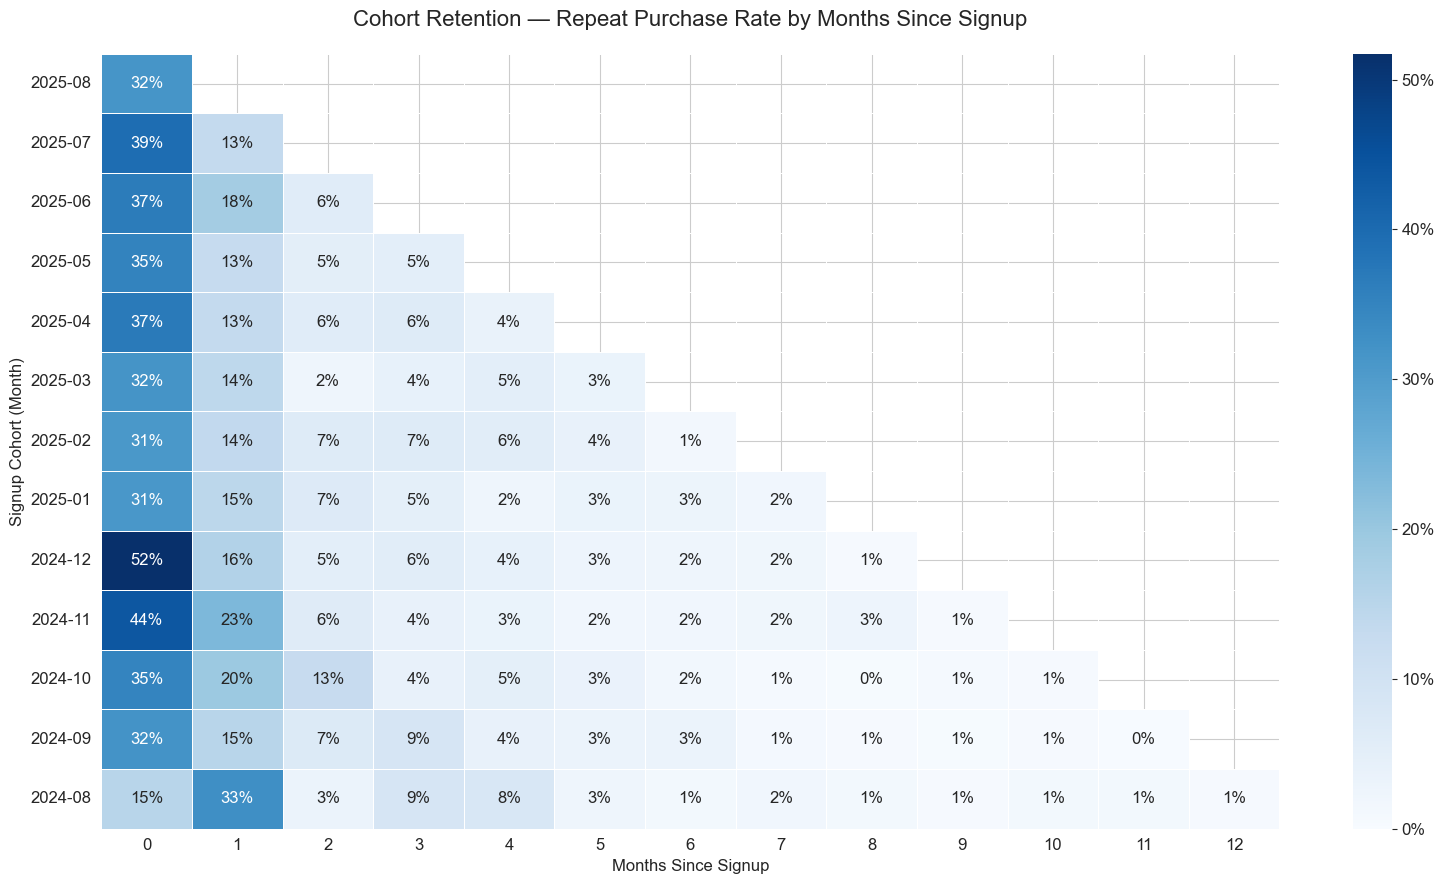

— Key Snapshot —
Avg first→second conversion: 17%
Month 1→3 change: ↓ -11%
Top cohorts (month‑1): 2024-08: 33%, 2024-11: 23%, 2024-10: 20%
Bottom cohorts (month‑1): 2025-05: 13%, 2025-04: 13%, 2025-07: 13%


In [3]:
# --- Retention Cohort - Repeat Purchase by Months Since Singup ---

sql_cohort_grid = "SELECT * FROM dash_retention_cohort_grid;"
df = q(sql_cohort_grid)

if df.empty:
    print("Could not generate cohort grid: The query returned no data.")
else:
    # --- Detect long vs wide -----------------------------------------------
    cols = df.columns.tolist()
    has_long_cols = set(["cohort_month", "months_since_signup"]).issubset(set(cols))
    # If columns look like digits 0..12, treat as wide
    digit_cols = [c for c in cols if str(c).isdigit() and 0 <= int(c) <= 12]

    if has_long_cols:
        # Long → pivot
        df_long = df.copy()

        # Ensure proper dtypes
        df_long["months_since_signup"] = pd.to_numeric(df_long["months_since_signup"], errors="coerce")
        # pick metric column name robustly
        metric_col = "retention_rate" if "retention_rate" in df_long.columns else \
                     "repeat_purchase_rate" if "repeat_purchase_rate" in df_long.columns else \
                     df_long.columns.difference(["cohort_month","months_since_signup"]).tolist()[0]
        df_long[metric_col] = pd.to_numeric(df_long[metric_col], errors="coerce")

        cohort_mat = df_long.pivot_table(
            index="cohort_month",
            columns="months_since_signup",
            values=metric_col,
            aggfunc="mean"
        )
    elif digit_cols:
        # Already wide
        cohort_mat = df.set_index("cohort_month")[digit_cols]
        # make sure columns are ints for sorting/labels
        cohort_mat.columns = list(map(int, cohort_mat.columns))
        cohort_mat = cohort_mat.sort_index(axis=1)
    else:
        raise ValueError("Could not detect long or wide format for cohort grid.")

    # --- Normalize to proportions (0..1) ------------------------------------
    # If values look like 37/42 (percent), scale down
    sample_vals = pd.to_numeric(pd.Series(cohort_mat.stack().head(100)), errors="coerce").dropna()
    if not sample_vals.empty and sample_vals.max() > 1.0:
        cohort_mat = cohort_mat / 100.0

    # --- Order cohorts (newest first) ---------------------------------------
    try:
        cohort_mat = cohort_mat.sort_index(key=lambda s: pd.to_datetime(s, errors="coerce"), ascending=False)
    except Exception:
        cohort_mat = cohort_mat.sort_index(ascending=False)

    # --- Mask NaNs in annotations to avoid 'nan%' ---------------------------
    annot_mat = cohort_mat.copy()

# --- Sanitize matrix first (keep 0..1, drop inf) ---------------------------
mat = cohort_mat.replace([np.inf, -np.inf], np.nan).clip(lower=0, upper=1)

# --- Build clean annotation strings (no NaN%, no errors) -------------------
# 1) scale to percent & round while staying in nullable dtypes
tmp = (mat * 100).round(0).astype('Float64')      # nullable float
ints = tmp.astype('Int64')                        # nullable int (allows NA)

# 2) convert to strings, blank out NAs, then append '%'
annot_df = ints.astype(str).mask(lambda s: s.eq('<NA>'), '')
annot_str = np.where(annot_df.ne('').values, (annot_df + '%').values, '')

# --- Plot ---------------------------------------------------------------
plt.figure(figsize=(16, 9))
ax = sns.heatmap(
    mat,                      # use the sanitized matrix
    annot=annot_str,
    fmt='',
    cmap='Blues',
    linewidths=.5,
    linecolor='white',
    cbar_kws={'format': mtick.PercentFormatter(1.0)},
    vmin=0, vmax=float(np.nanmax(mat)) if np.isfinite(np.nanmax(mat)) else 1.0
)
ax.set_title("Cohort Retention — Repeat Purchase Rate by Months Since Signup", fontsize=16, pad=20)
ax.set_xlabel("Months Since Signup"); ax.set_ylabel("Signup Cohort (Month)")
plt.xticks(rotation=0); plt.tight_layout(); plt.show()

summary = {}

# Average first→second conversion across cohorts (col = 1)
if 1 in cohort_mat.columns:
    summary['avg_first_to_second'] = float(np.nanmean(cohort_mat[1]))  # proportion

# Average month-0 repeat purchase rate (if you include it)
if 0 in cohort_mat.columns:
    summary['avg_month0_repurch'] = float(np.nanmean(cohort_mat[0]))

# Decay from month 1 to month 3 (early engagement slope)
if set([1,3]).issubset(cohort_mat.columns):
    m1 = float(np.nanmean(cohort_mat[1]))
    m3 = float(np.nanmean(cohort_mat[3]))
    summary['m1_to_m3_delta'] = m3 - m1

# Best/worst cohorts by month‑1 retention (top/bottom 3 with enough data)
if 1 in cohort_mat.columns:
    m1_series = cohort_mat[1].dropna()
    top3 = m1_series.sort_values(ascending=False).head(3)
    bot3 = m1_series.sort_values().head(3)
else:
    top3 = bot3 = pd.Series(dtype=float)

print("— Key Snapshot —")
if 'avg_first_to_second' in summary:
    print(f"Avg first→second conversion: {summary['avg_first_to_second']:.0%}")
if 'm1_to_m3_delta' in summary:
    sign = "↓" if summary['m1_to_m3_delta'] < 0 else "↑"
    print(f"Month 1→3 change: {sign} {summary['m1_to_m3_delta']:.0%}")
if len(top3):
    print("Top cohorts (month‑1): " + ", ".join([f"{idx}: {val:.0%}" for idx, val in top3.items()]))
if len(bot3):
    print("Bottom cohorts (month‑1): " + ", ".join([f"{idx}: {val:.0%}" for idx, val in bot3.items()]))

In [ ]:
# --- Sample of df_cohort ---

df_cohort = q(sql_cohort_grid)
df_cohort.sample(10)

,cohort_month,total_customers,months_since_signup,active_customers,retention_rate
21,2024-09,508,8,4,0.007874
68,2025-02,467,5,18,0.038544
8,2024-08,158,8,2,0.012658
81,2025-05,482,0,170,0.352697
12,2024-08,158,12,1,0.006329
43,2024-11,498,7,11,0.022088
42,2024-11,498,6,10,0.020080
24,2024-09,508,11,2,0.003937
35,2024-10,490,10,3,0.006122
6,2024-08,158,6,2,0.012658


### 🧠 What this shows
- **Early conversion:** Month-1 averages around **17%**; cohorts **2024/08 & 2024/11** over-index, while **2025/04, 2025/05, & 2025/07** lag.  
- **Decay pattern:** Most cohorts decline by **~11 points** from Month-1 → Month-3, underscoring a **rapid falloff window**.  
- **Action window:** The **first 30–60 days** post-signup remain the prime re-engagement period.  

📌 **Implications:** Acquisition campaigns are working, but the majority of new customers do not build momentum beyond their first order. Cohorts that joined during seasonal peaks (e.g., Aug/Nov 2024) perform better — suggesting contextual or campaign-driven effects matter.  

👉 **Next Steps:**  
- Double down on **early-lifecycle campaigns** (bounce-back offers, personalized reminders) within the first 30 days.  
- **Study outperforming cohorts** (Aug/Nov 2024) to identify what creative, timing, or promotions drove stronger conversion.  
- Introduce **incentives for a second purchase** (loyalty points, discounts, product bundling) to reduce early decay and pull weaker cohorts up.  

## 📊 Retention by First-Purchase Cohort  

While signup-based cohorts show how **acquired customers** behave over time,  
first-purchase cohorts anchor retention from the moment a customer places their **first order**.  

- **Month 0** = 100% by definition (all customers made their first purchase).  
- **Subsequent months** measure the share of that cohort who return for additional purchases.  
- This view removes “non-converters” and focuses only on **post-purchase retention**.  

📌 **Why it matters**  
- Highlights the **critical churn window**: most drop-off occurs in the first 30 days after purchase.  
- Surfaces differences between cohorts in early repeat purchase rates (e.g., some cohorts convert 10–15% back in Month 1, others only ~6%).  
- Provides a clearer basis for **loyalty and re-engagement strategies**, since it shows how well converted customers are retained.  

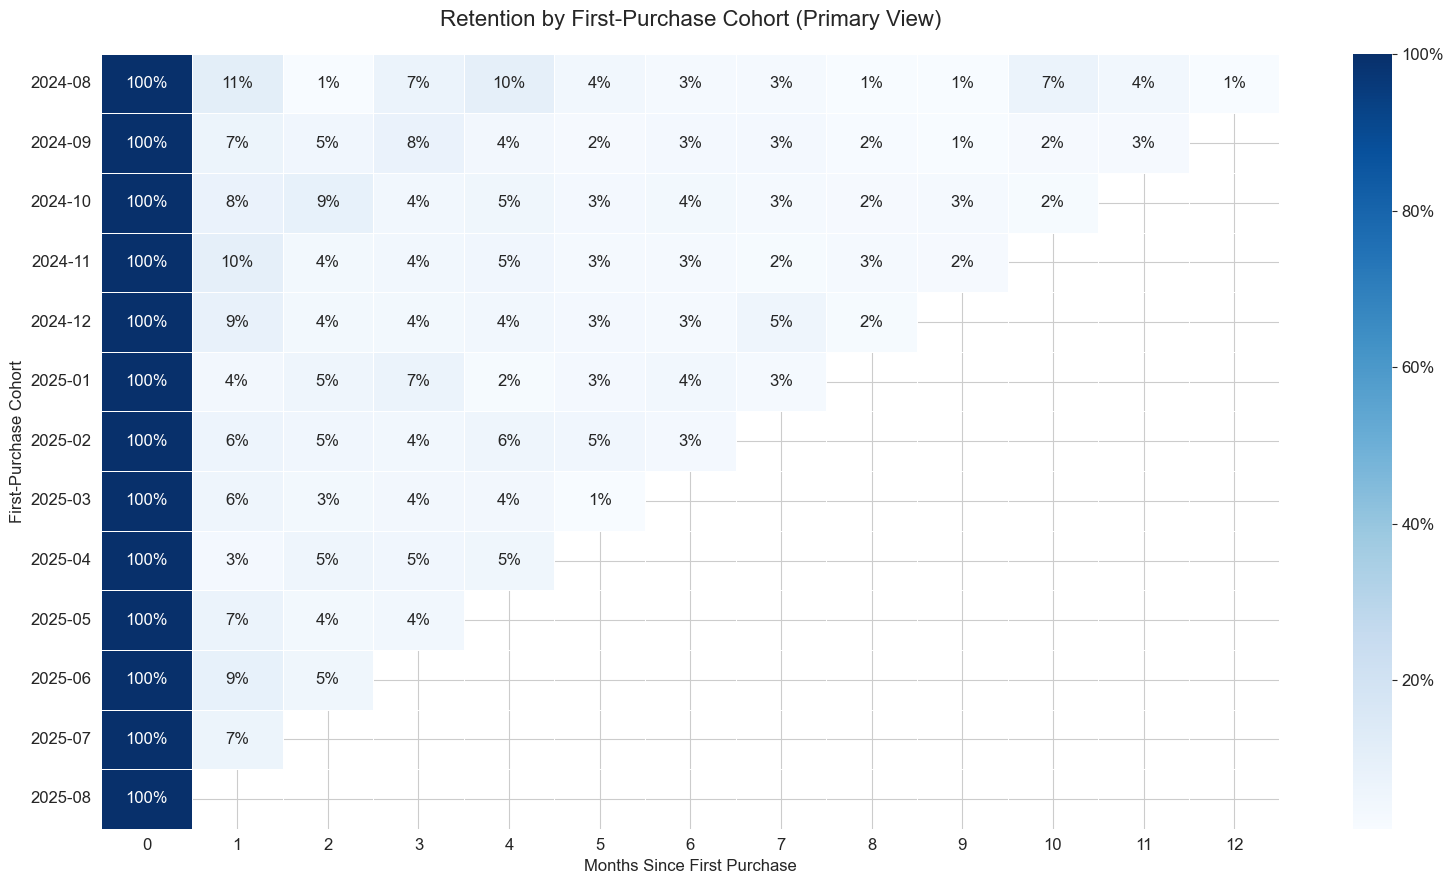

— Key Snapshot (First-Purchase Cohorts) —
Avg month-1 retention: 7%
Month 1→3 change: ↓ -2%
Top cohorts (month-1): 2024-08: 11%, 2024-11: 10%, 2025-06: 9%
Bottom cohorts (month-1): 2025-04: 3%, 2025-01: 4%, 2025-03: 6%


In [5]:
# --- Purchase-based retention heatmap (Primary View) ---
sql_purchase_grid = """
SELECT cohort_month, months_since, retention_rate
FROM dash_purchase_cohort_grid
WHERE months_since BETWEEN 0 AND 12
ORDER BY cohort_month, months_since;
"""
df_purchase = q(sql_purchase_grid)

if not df_purchase.empty:
    # Ensure cohorts plot in calendar order
    df_purchase["cohort_month"] = pd.to_datetime(df_purchase["cohort_month"])
    df_purchase = df_purchase.sort_values(["cohort_month", "months_since"])
    df_purchase["cohort_label"] = df_purchase["cohort_month"].dt.strftime("%Y-%m")

    pivot_purchase = df_purchase.pivot_table(
        index="cohort_label",
        columns="months_since",
        values="retention_rate"
    )

    plt.figure(figsize=(16, 9))
    sns.heatmap(
        pivot_purchase,
        annot=True,
        fmt=".0%",
        cmap="Blues",   # 🔵 Consistent palette
        linewidths=.5,
        linecolor="white",
        cbar_kws={"format": mtick.PercentFormatter(xmax=1)}
    )
    plt.title("Retention by First-Purchase Cohort (Primary View)", fontsize=16, pad=20)
    plt.xlabel("Months Since First Purchase")
    plt.ylabel("First-Purchase Cohort")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("No data in dash_purchase_cohort_grid (check view refresh).")

import numpy as np

summary_fp = {}

# Average month-1 retention across first-purchase cohorts
if 1 in pivot_purchase.columns:
    summary_fp['avg_m1'] = float(np.nanmean(pivot_purchase[1]))

# Drop from month 1 → 3
if set([1,3]).issubset(pivot_purchase.columns):
    m1 = float(np.nanmean(pivot_purchase[1]))
    m3 = float(np.nanmean(pivot_purchase[3]))
    summary_fp['m1_to_m3_delta'] = m3 - m1

# Best/worst cohorts at month-1
if 1 in pivot_purchase.columns:
    m1_series_fp = pivot_purchase[1].dropna()
    top3_fp = m1_series_fp.sort_values(ascending=False).head(3)
    bot3_fp = m1_series_fp.sort_values().head(3)
else:
    top3_fp = bot3_fp = pd.Series(dtype=float)

print("— Key Snapshot (First-Purchase Cohorts) —")
if 'avg_m1' in summary_fp:
    print(f"Avg month-1 retention: {summary_fp['avg_m1']:.0%}")
if 'm1_to_m3_delta' in summary_fp:
    sign = "↓" if summary_fp['m1_to_m3_delta'] < 0 else "↑"
    print(f"Month 1→3 change: {sign} {summary_fp['m1_to_m3_delta']:.0%}")
if len(top3_fp):
    print("Top cohorts (month-1): " + ", ".join([f"{idx}: {val:.0%}" for idx, val in top3_fp.items()]))
if len(bot3_fp):
    print("Bottom cohorts (month-1): " + ", ".join([f"{idx}: {val:.0%}" for idx, val in bot3_fp.items()]))

### 🧠 What this shows  

- **Early repeat rates:** On average, only ~7% of first-purchase customers return in Month-1.  
- **Drop-off pattern:** Retention falls a further ~2 percentage points by Month-3, underscoring a fast decay curve.  
- **Cohort differences:** Top cohorts (e.g., 2024-11) retain 9–11% in Month-1, while weaker ones (e.g., 2025-01, 2025-04) hover near 3%.  
- **Action window:** The **first 30–60 days after a purchase** remain the critical moment for re-engagement and loyalty initiatives.  

📌 **Implications:** Current acquisition efforts are pulling in customers, but most churn almost immediately. The first purchase is not creating enough stickiness to drive natural repeat behavior.  

👉 **Next Steps:**  
- Launch **targeted re-engagement campaigns (email/SMS)** within 30 days of signup to capture at-risk cohorts.  
- Test **first-purchase incentives** (e.g., bounce-back discounts, loyalty points for 2nd purchase) to push conversion into Month-2.  
- Segment and study **outlier cohorts** (e.g., 2024-11) to identify what drove stronger retention and replicate those levers.  

### 📊 First→Second Purchase Conversion Analysis  

We want to understand **how many first-time buyers return for a second purchase**, and **how quickly**.  
- *Conversion metric*: % of each signup cohort who make a second purchase.  
- *Speed metric*: average number of days until that second purchase.  
- We include a **25% target line** as a business benchmark.  
  - It represents a “minimum healthy” standard often used in retail/e-commerce 
  - If at least one in four new customers come back for a second order, the funnel is showing early signs of stickiness. 

By combining these into one view, we can evaluate both **funnel strength** (are we converting repeat buyers?) and **funnel velocity** (how fast are they coming back?).

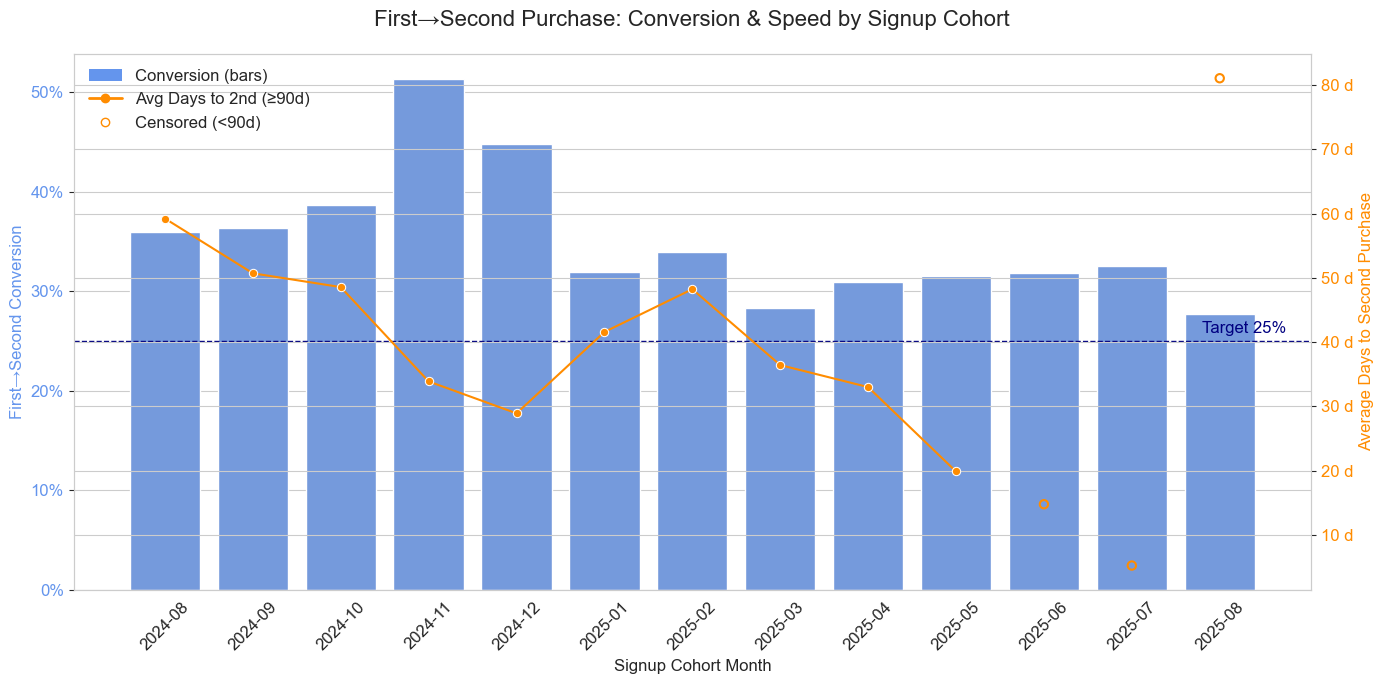

— Key Snapshot (First→Second) —
Avg conversion: 35%
Fastest return cohorts: 2025-05: 20d, 2024-12: 29d, 2025-04: 33d
Slowest return cohorts: 2024-08: 59d, 2024-09: 51d, 2024-10: 49d


In [6]:
# --- First→Second Purchase: Conversion & Speed by Signup Cohort ---

from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sql_kpis = "SELECT * FROM dash_retention_kpis_by_cohort;"
df_kpis = q(sql_kpis)

if df_kpis.empty:
    print("Could not generate KPI chart: The query returned no data.")
else:
    df = df_kpis.copy()

    # Required columns
    needed = {"cohort_month","first_to_second_conversion","avg_days_to_second_purchase"}
    miss = needed - set(df.columns)
    if miss:
        raise KeyError(f"Missing expected column(s): {sorted(miss)}")

    # Dates & cohort age (for right-censor guard on days metric)
    df["cohort_month"] = pd.to_datetime(df["cohort_month"], errors="coerce")
    df = df.dropna(subset=["cohort_month"])
    cutoff_days = 90
    if "max_observed_date" in df.columns:
        max_date = pd.to_datetime(df["max_observed_date"], errors="coerce").max()
        if pd.isna(max_date):
            max_date = pd.Timestamp.today().normalize()
    else:
        max_date = pd.Timestamp.today().normalize()
    df["age_days"] = (max_date - df["cohort_month"]).dt.days

    # Labels/order
    df = df.sort_values("cohort_month")
    df["cohort_label"] = df["cohort_month"].dt.strftime("%Y-%m")
    order = df["cohort_label"].tolist()

    # Split for censoring (days metric only for cohorts old enough)
    df_old = df.loc[df["age_days"] >= cutoff_days].copy()
    df_new = df.loc[df["age_days"] <  cutoff_days].copy()

    # ---- Plot
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Bars: conversion (% on left axis)
    sns.barplot(
        x="cohort_label", y="first_to_second_conversion",
        data=df, ax=ax1, color="cornflowerblue", order=order
    )
    ax1.set_ylabel("First→Second Conversion", color="cornflowerblue")
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax1.tick_params(axis="y", labelcolor="cornflowerblue")

    # Optional target
    target = 0.25
    ax1.axhline(target, ls="--", lw=1, color="navy")
    ax1.text(0.98, target + 0.005, "Target 25%", color="navy",
             ha="right", va="bottom", transform=ax1.get_yaxis_transform())

    # Line: avg days to 2nd purchase (right axis)
    ax2 = ax1.twinx()
    if not df_old.empty:
        sns.lineplot(
            x="cohort_label", y="avg_days_to_second_purchase",
            data=df_old, ax=ax2, color="darkorange", marker="o", sort=False
        )
    if not df_new.empty:
        # show censored cohorts as hollow points so they’re visible but de‑emphasized
        ax2.scatter(
            df_new["cohort_label"], df_new["avg_days_to_second_purchase"],
            facecolors="none", edgecolors="darkorange", marker="o", linewidths=1.5
        )

    ax2.set_ylabel("Average Days to Second Purchase", color="darkorange")
    ax2.tick_params(axis="y", labelcolor="darkorange")
    ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:.0f} d"))

    # X formatting (avoid set_ticklabels warning)
    ax1.set_xlabel("Signup Cohort Month")
    ax1.tick_params(axis="x", rotation=45)

    plt.title("First→Second Purchase: Conversion & Speed by Signup Cohort", fontsize=16, pad=20)

    # Clean manual legend
    for ax in (ax1, ax2):
        leg = ax.get_legend()
        if leg is not None:
            leg.remove()

    legend_handles = [
        Patch(facecolor="cornflowerblue", edgecolor="none", label="Conversion (bars)"),
        Line2D([0],[0], color="darkorange", marker="o", lw=2, label="Avg Days to 2nd (≥90d)"),
    ]
    if not df_new.empty:
        legend_handles.append(
            Line2D([0],[0], color="darkorange", marker="o", linestyle="None",
                   markerfacecolor="none", markeredgecolor="darkorange", lw=0,
                   label="Censored (<90d)")
        )
    ax1.legend(handles=legend_handles, loc="upper left", frameon=False)

    fig.tight_layout()
    plt.show()

    # --- Snapshot stats (use current variables: df for bars, df_old for days) ---
    conv_avg = float(np.nanmean(df["first_to_second_conversion"]))

    fastest = pd.DataFrame(columns=["cohort_label","avg_days_to_second_purchase"])
    slowest = pd.DataFrame(columns=["cohort_label","avg_days_to_second_purchase"])
    if not df_old.empty and "avg_days_to_second_purchase" in df_old.columns:
        fastest = df_old.nsmallest(3, "avg_days_to_second_purchase")[["cohort_label","avg_days_to_second_purchase"]]
        slowest = df_old.nlargest(3, "avg_days_to_second_purchase")[["cohort_label","avg_days_to_second_purchase"]]

    # Correlation (align cohorts available in both series)
    try:
        from scipy.stats import spearmanr
        aligned = df.merge(
            df_old[["cohort_label","avg_days_to_second_purchase"]],
            on="cohort_label", how="inner"
        )
        if len(aligned) >= 3:
            rho, p = spearmanr(
                aligned["first_to_second_conversion"],
                aligned["avg_days_to_second_purchase"],
                nan_policy="omit"
            )
        else:
            rho, p = np.nan, np.nan
    except Exception:
        rho, p = np.nan, np.nan

    print("— Key Snapshot (First→Second) —")
    print(f"Avg conversion: {conv_avg:.0%}")
    if not np.isnan(rho):
        print(f"Speed correlation (conversion vs days): ρ={rho:.2f} (p={p:.3f})  # negative suggests faster return ↔ higher conversion")
    if not fastest.empty:
        print("Fastest return cohorts:", ", ".join([f"{r.cohort_label}: {int(round(r.avg_days_to_second_purchase))}d" for _, r in fastest.iterrows()]))
    if not slowest.empty:
        print("Slowest return cohorts:", ", ".join([f"{r.cohort_label}: {int(round(r.avg_days_to_second_purchase))}d" for _, r in slowest.iterrows()]))

### 🧠 Insights: First → Second Purchase

- **Stable Conversion:** Average first→second conversion is ~35%, a strong baseline.  
- **Return Speed:** Most cohorts return in ~45 days, with fastest groups as early as 20–29 days.  
- **Holiday Spike:** Nov ’24 cohort hit >50% conversion, likely boosted by holiday shoppers.  
- **Consistency:** Cohorts are converting at steady levels, suggesting no systemic retention issue.  

📌 **Implications:** Conversion performance is healthy overall, but spikes in holiday cohorts show that **contextual factors (seasonality, campaigns, promotions)** can significantly improve outcomes. Current stability is positive, but there’s untapped upside in replicating peak-season tactics across the year.  

👉 **Next Steps:**  
- **Deconstruct Nov/Dec cohorts**: Analyze marketing campaigns, product mixes, and promo strategies that drove >50% conversion.  
- **Replicate levers**: Apply successful holiday tactics (bundles, urgency offers, themed campaigns) to other seasonal or high-traffic periods.  
- **Tighten return speed**: Introduce bounce-back offers or loyalty incentives to pull average return closer to the 20–29 day window of top cohorts.  

## 📊 Retention by Loyalty Tier

We compare tiers on three signals:
- **Repeat rate** – share of customers who ever repeat (overall stickiness)
- **Avg lifetime orders** – depth of engagement
- **Avg days between orders** – cadence/speed (lower is better)

This shows which tiers are already sticky (nurture) and where to accelerate **BRONZE→SILVER** progression.

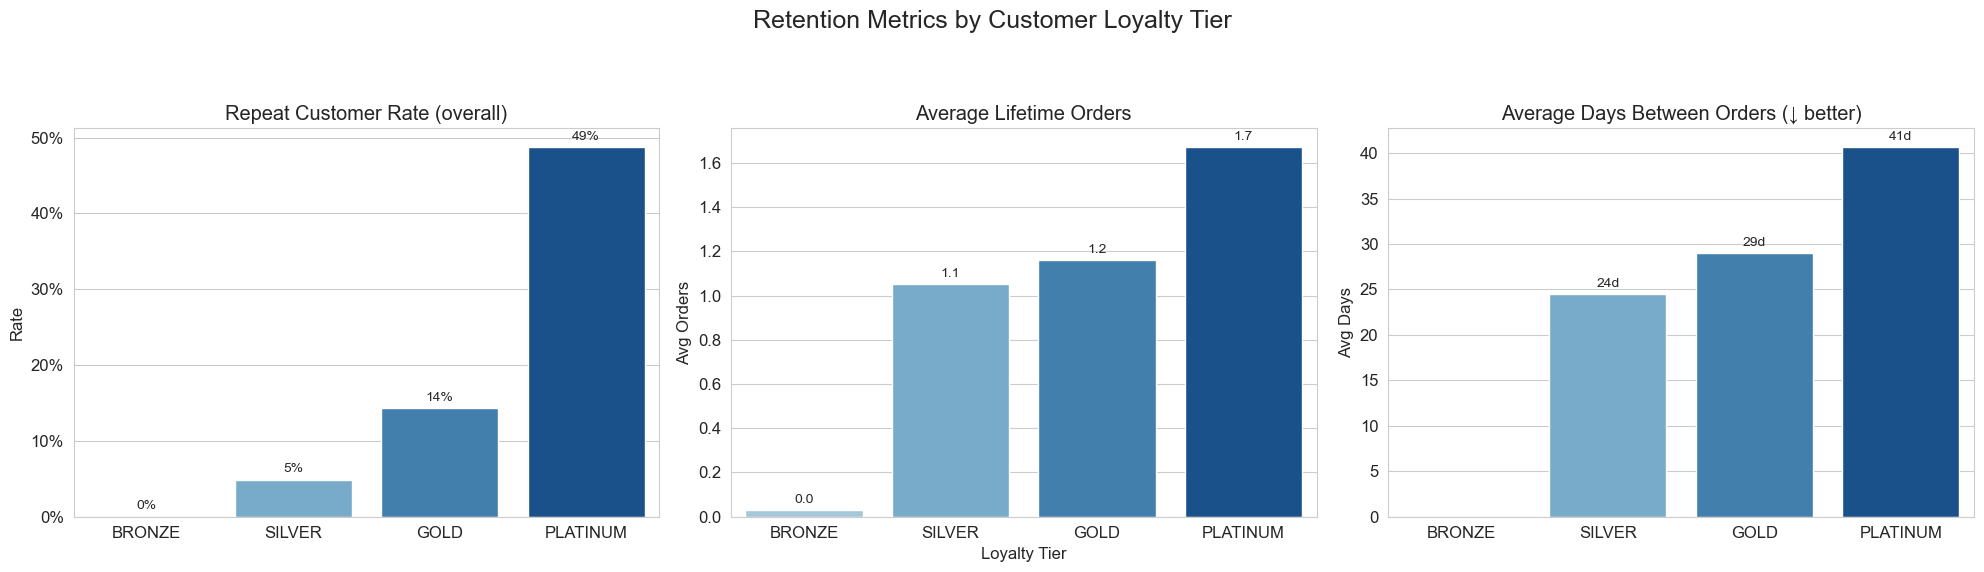

,loyalty_tier,total_customers,repeat_customers,repeat_rate_pct,avg_lifetime_orders,avg_days_btwn_orders
4,BRONZE,2684,0,0.0,0.029806,NaN
2,SILVER,430,21,4.9,1.051163,24.500000
1,GOLD,607,87,14.3,1.159802,29.044061
0,PLATINUM,2279,1112,48.8,1.672663,40.699535


— Key Snapshot (Loyalty Tiers) —
Top repeat tier: PLATINUM at 49%
Lowest repeat tier: BRONZE at 0%
Lift vs BRONZE: +49% repeat rate
Fastest cadence: SILVER at 24 days between orders


In [7]:
# --- Retention by Loyalty Tier (brand-consistent, no warnings, clean labels) ---

sql_loyalty = """
SELECT loyalty_tier, total_customers, repeat_customers,
       repeat_customer_rate_overall, avg_days_between_orders, avg_lifetime_orders
FROM dash_retention_by_loyalty_tier
ORDER BY avg_lifetime_orders DESC;
"""
df_loyalty = q(sql_loyalty)

if df_loyalty.empty:
    print("Could not generate loyalty chart: The query returned no data.")
else:
    df = df_loyalty.copy()

    # Clean & standardize
    df = df_loyalty.copy()
    df = df.dropna(subset=["loyalty_tier"])
    df["loyalty_tier"] = df["loyalty_tier"].astype("string").str.strip().str.upper()
    df = df[df["loyalty_tier"] != "NONE"]

    # Back-compat rename → repeat_rate in [0,1]
    if "repeat_customer_rate_overall" in df.columns:
        df = df.rename(columns={"repeat_customer_rate_overall": "repeat_rate"})
    elif "repeat_customer_rate" in df.columns:
        df = df.rename(columns={"repeat_customer_rate": "repeat_rate"})

    # Ensure numeric types
    for c in ["repeat_rate","avg_days_between_orders","avg_lifetime_orders",
              "total_customers","repeat_customers"]:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

    # Canonical tier order
    tier_order = ["BRONZE","SILVER","GOLD","PLATINUM"]
    df = df[df["loyalty_tier"].isin(tier_order)]
    df["loyalty_tier"] = pd.Categorical(df["loyalty_tier"], categories=tier_order, ordered=True)
    df = df.sort_values("loyalty_tier")

    # Brand palette (Blues light → dark)
    tier_palette = {
        "BRONZE":   "#9ecae1",
        "SILVER":   "#6baed6",
        "GOLD":     "#3182bd",
        "PLATINUM": "#08519c",
    }

    fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)
    fig.suptitle("Retention Metrics by Customer Loyalty Tier", fontsize=18)

    # Helper to draw a single-color-per-bar chart without warnings
    def barplot_categorical(ax, x, y, title, ylabel="", yfmt=None, note_down_better=False):
        # Use 'hue=x' + palette dict + legend=False to avoid seaborn deprecation
        sns.barplot(
            ax=ax,
            x=x, y=y, hue=x, data=df,
            dodge=False, legend=False,
            palette=tier_palette,
            errorbar=None  # no CI whiskers
        )
        ax.set_title(f"{title}{' (↓ better)' if note_down_better else ''}")
        ax.set_xlabel("")
        ax.set_ylabel(ylabel)

        # Nice y formatting
        if yfmt == "pct":
            ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        # Annotate bars
        for p in ax.patches:
            h = p.get_height()
            if pd.notna(h):
                if yfmt == "pct":
                    label = f"{h:.0%}"
                elif yfmt == "days":
                    label = f"{h:.0f}d"
                else:
                    label = f"{h:.1f}"
                ax.annotate(
                    label,
                    (p.get_x() + p.get_width()/2., h),
                    ha="center", va="bottom", fontsize=10,
                    xytext=(0, 3), textcoords="offset points"
                )

    # 1) Repeat rate (percent)
    barplot_categorical(
        axes[0], x="loyalty_tier", y="repeat_rate",
        title="Repeat Customer Rate (overall)",
        ylabel="Rate", yfmt="pct"
    )

    # 2) Average lifetime orders
    barplot_categorical(
        axes[1], x="loyalty_tier", y="avg_lifetime_orders",
        title="Average Lifetime Orders",
        ylabel="Avg Orders", yfmt=None
    )
    axes[1].set_xlabel("Loyalty Tier")

    # 3) Average days between orders (lower is better)
    barplot_categorical(
        axes[2], x="loyalty_tier", y="avg_days_between_orders",
        title="Average Days Between Orders", ylabel="Avg Days",
        yfmt="days", note_down_better=True
    )

    plt.tight_layout(rect=[0, 0.03, 1, 0.92])
    plt.show()

    # Tidy table
    display(
        df.assign(repeat_rate_pct=(df["repeat_rate"]*100).round(1))
          .rename(columns={"avg_days_between_orders":"avg_days_btwn_orders"})
          [["loyalty_tier","total_customers","repeat_customers","repeat_rate_pct","avg_lifetime_orders","avg_days_btwn_orders"]]
    )

    # Snapshot
    best_repeat = df.loc[df["repeat_rate"].idxmax()]
    worst_repeat = df.loc[df["repeat_rate"].idxmin()]
    bronze_rate = df.loc[df["loyalty_tier"]=="BRONZE","repeat_rate"].mean()
    lift_vs_bronze = (best_repeat["repeat_rate"] - bronze_rate) if pd.notna(bronze_rate) else np.nan
    fastest = df.loc[df["avg_days_between_orders"].idxmin()]

    print("— Key Snapshot (Loyalty Tiers) —")
    print(f"Top repeat tier: {best_repeat['loyalty_tier']} at {best_repeat['repeat_rate']:.0%}")
    print(f"Lowest repeat tier: {worst_repeat['loyalty_tier']} at {worst_repeat['repeat_rate']:.0%}")
    if pd.notna(lift_vs_bronze):
        print(f"Lift vs BRONZE: +{lift_vs_bronze:.0%} repeat rate")
    print(f"Fastest cadence: {fastest['loyalty_tier']} at {fastest['avg_days_between_orders']:.0f} days between orders")

#### 🚨 Insights: Loyalty Tier Effectiveness

- **Bronze (0% repeat):** Essentially dormant — no measurable loyalty effect. Second largest cohort at *2.6k members* 
- **Silver (~5% repeat, ~24‑day cadence, ~1.1 lifetime orders):** Some activity but far below benchmark; most customers don’t come back.  
- **Gold (~14% repeat, ~29‑day cadence, ~1.2 lifetime orders):** Better than Silver but still shallow engagement.  
- **Platinum (~49% repeat, ~41‑day cadence, ~1.7 lifetime orders):** The only tier showing material retention, though still under 2 orders on average.

📌 **Implication:** The loyalty program is **not generating ROI outside of Platinum**. Most customers see little incentive to return, suggesting:
1. **Bronze benefits are too weak** to attract or engage new customers.  
2. **Silver/Gold benefits are not compelling enough** to encourage progression from Bronze.  
3. **Conversion to Platinum may be too easy**, skipping opportunities to drive incremental sales within lower tiers.

👉 **Next step:** Prioritize a Bronze deep‑dive. Diagnose whether this cohort skews toward low‑spend, promo‑driven, or disengaged shoppers to inform a redesign of early‑tier benefits and progression nudges.

## 📊 CLV by Signup Channel

Goal: identify **which acquisition channels bring higher‑value customers** (CLV) and at what **scale**.

We show:
- **Mix quality**: share of **LOW / MEDIUM / HIGH** CLV per channel (100% stacked).
- **Volume**: total customers per channel (so a “great” mix isn’t just tiny).

Use this to prioritize **budget allocation** and **remarketing** to channels that over‑index on **HIGH CLV** at meaningful volume.

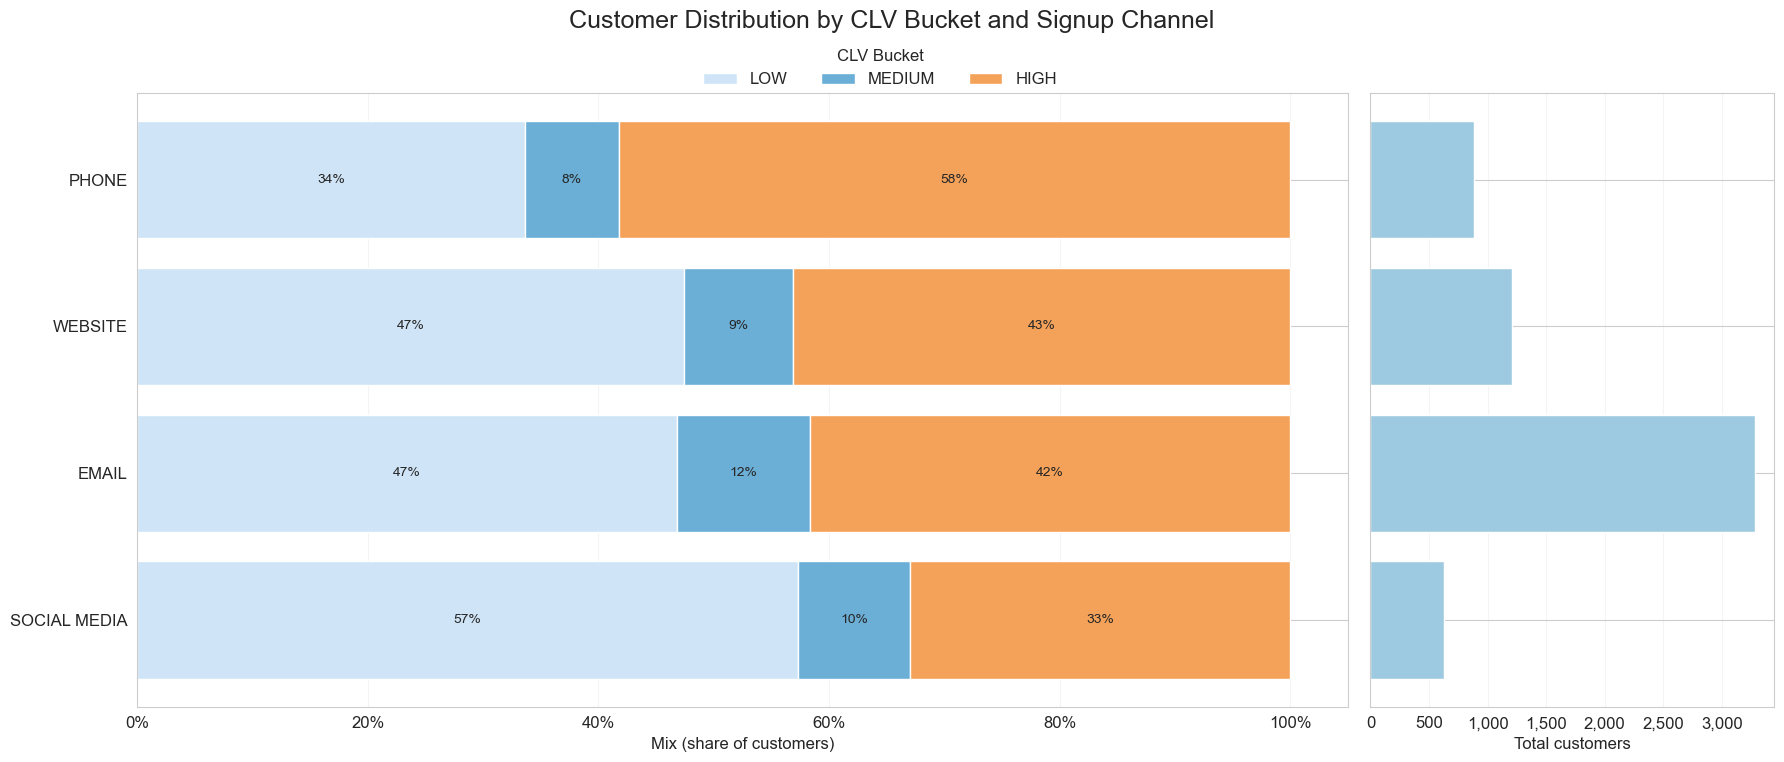

clv_bucket,HIGH_%,MED_%,LOW_%,total_customers
signup_channel,,,,
PHONE,58.3,8.1,33.7,630
WEBSITE,43.1,9.4,47.4,3282
EMAIL,41.7,11.5,46.8,1205
SOCIAL MEDIA,33.0,9.7,57.3,883


— Key Snapshot (CLV by Channel) —
Top HIGH‑CLV channels: PHONE (58% HIGH, 630.0 cust), WEBSITE (43% HIGH, 3,282.0 cust), EMAIL (42% HIGH, 1,205.0 cust)
Bottom HIGH‑CLV channels: SOCIAL MEDIA (33% HIGH, 883.0 cust), EMAIL (42% HIGH, 1,205.0 cust), WEBSITE (43% HIGH, 3,282.0 cust)


In [8]:
# --- CLV by Signup Channel: quality (mix) + scale (volume) ---

sql_clv = "SELECT * FROM dash_retention_clv_by_channel;"
df_clv = q(sql_clv)

if df_clv.empty:
    print("Could not generate CLV chart: The query returned no data.")
else:
    df = df_clv.copy()

    # Basic cleaning
    for c in ["signup_channel", "clv_bucket"]:
        if c in df.columns:
            df[c] = df[c].astype("string").str.strip()

    # Canonical bucket order
    bucket_order = ["LOW", "MEDIUM", "HIGH"]
    df = df[df["clv_bucket"].isin(bucket_order)]
    df["clv_bucket"] = pd.Categorical(df["clv_bucket"], categories=bucket_order, ordered=True)

    # Pivot counts: channels x buckets
    ct = (
        df.pivot_table(index="signup_channel", columns="clv_bucket",
                       values="number_of_customers", aggfunc="sum", observed=False)
          .fillna(0)
          .astype(float)
    )

    # Shares for 100% stacked
    totals = ct.sum(axis=1)
    shares = (ct.T / totals.replace(0, np.nan)).T.fillna(0)

    # Order channels by HIGH-CLV share (desc) then by volume (desc)
    order = (
        shares.assign(_high=shares.get("HIGH", 0.0), _n=totals)
              .sort_values(by=["_high","_n"], ascending=[False, False])
              .index.tolist()
    )
    shares = shares.loc[order]
    ct = ct.loc[order]
    totals = totals.loc[order]

    # Palette: Blues for LOW/MED, warm accent for HIGH
    colors = {
        "LOW":   "#cfe4f6",  # light blue
        "MEDIUM":" #6baed6".replace(" ",""),  # mid blue
        "HIGH":  "#f4a259"   # warm accent
    }

    # Plot: 100% stacked (mix) + volume bars
    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(18, 8), gridspec_kw={"width_ratios":[3, 1]}
    )
    fig.suptitle("Customer Distribution by CLV Bucket and Signup Channel", fontsize=18)

    # Left: 100% stacked horizontal bars for shares
    y = np.arange(len(shares.index))
    left = np.zeros(len(shares))
    for b in bucket_order:
        w = shares[b].values if b in shares.columns else np.zeros(len(shares))
        ax1.barh(y, w, left=left, color=colors[b], edgecolor="white", label=b)
        # annotate segments > 6%
        for i, val in enumerate(w):
            if val >= 0.06:
                ax1.text(left[i] + val/2, i, f"{val:.0%}", va="center", ha="center", fontsize=10)
        left += w

    ax1.set_yticks(y)
    ax1.set_yticklabels(shares.index)
    ax1.set_xlabel("Mix (share of customers)")
    ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax1.invert_yaxis()  # best channels (high HIGH-CLV share) at top
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(
    handles[:3], labels[:3],
    title="CLV Bucket",
    frameon=False,
    loc="upper right",
    bbox_to_anchor=(0.60, 0.95),   # adjust these numbers to fine-tune placement
    ncol=3                         # horizontal layout
)

    # Right: total customers (same y so rows align)
    ax2.barh(y, totals.values, color="#9ecae1")
    ax2.set_yticks(y)
    ax2.set_yticklabels([])  # labels already on ax1
    ax2.set_xlabel("Total customers")
    # tidy x ticks (thousands)
    ax2.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v, pos: f"{int(v):,}"))

    # Grid/spacing
    for ax in (ax1, ax2):
        ax.grid(axis="x", alpha=0.2)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Snapshot table (rank by HIGH share, include totals)
    snap = (
        shares.assign(total_customers=totals.astype(int))
              .rename(columns={"LOW":"low_share","MEDIUM":"med_share","HIGH":"high_share"})
    )
    display(
        snap[["high_share","med_share","low_share","total_customers"]]
            .assign(high_share=lambda d: (d["high_share"]*100).round(1),
                    med_share=lambda d: (d["med_share"]*100).round(1),
                    low_share=lambda d: (d["low_share"]*100).round(1))
            .rename(columns={"high_share":"HIGH_%","med_share":"MED_%","low_share":"LOW_%"})
    )

    # Console snapshot
    top = snap.sort_values("high_share", ascending=False).head(3)
    bottom = snap.sort_values("high_share", ascending=True).head(3)
    print("— Key Snapshot (CLV by Channel) —")
    print("Top HIGH‑CLV channels:",
          ", ".join([f"{idx} ({row.high_share:.0%} HIGH, {row.total_customers:,} cust)"
                     for idx, row in top.iterrows()]))
    print("Bottom HIGH‑CLV channels:",
          ", ".join([f"{idx} ({row.high_share:.0%} HIGH, {row.total_customers:,} cust)"
                     for idx, row in bottom.iterrows()]))

#### 🧠 Insights: CLV by Signup Channel

- **Phone (58% HIGH-CLV, ~630 customers):** Surprisingly the strongest channel for high-value customers despite its smaller volume. Likely reflects an **older or more committed demographic** who prefer calling to place orders.  
  
- **Website (43% HIGH-CLV, ~3.3K customers):** The largest acquisition source by volume, but proportionally weaker in high-CLV. Suggests the website attracts more **casual, one-time buyers**. Given that Website is an **organic acquisition driver**, improving **SEO and on-site conversion flows** could turn more visitors into high-value repeat customers.  
  
- **Email (42% HIGH-CLV, ~1.2K customers):** Strong performance given it is the **largest signup channel overall**. Indicates that **email campaigns are cost-effective drivers of high-value customers**. 
   
- **Social Media (33% HIGH-CLV, ~880 customers):** Smallest channel with the lowest quality mix. Likely better positioned as a **top-funnel awareness tool** rather than a retention/CLV driver.  


📌 **Implication:** Acquisition quality varies significantly by channel. **Organic drivers (Phone and Website) are producing the highest-value customers**, but the Website underperforms relative to its scale. Email continues to deliver strong ROI, while Social Media should be repositioned.  

👉 **Next step:**  
- **Snapshot scope:** Double down on Email ROI and investigate Website underperformance (SEO + conversion optimization).  
- **Deep dive suggestion:** Add **age cohorts × signup channel** to test the hypothesis that Phone’s high-CLV skew comes from older customers. This will refine channel strategy and help tailor retention offers by demographic. 
- **Web traffic drill-down:** Align **abandoned carts with CLV buckets, age demographics, and regional cohorts** to sharpen acquisition and conversion strategy.

## 📌 Conclusion  

This retention snapshot confirms that while **customer acquisition has been strong**, repeat engagement is the critical growth lever going forward.  

- **Cohorts:** Steep drop-off by Month-3 highlights the importance of the **first 30–60 days** post-signup.  
- **First→Second Conversion:** At ~34% on average, this is the most reliable early churn indicator, with Nov/Dec cohorts showing outsized strength.  
- **Loyalty Tiers:** Only Platinum delivers ROI; Bronze and Silver remain effectively dormant.  
- **Channels:** Organic sources (Phone, Website) and **Email** drive the highest-value customers, while **Social Media** underperforms as a retention lever.  

🔁 **Implications & Actions**  
To improve retention and lifetime value, the business should:  
1. **Target early churn** with re-engagement campaigns (email/SMS, bounce-back offers) within 60 days of signup.  
2. **Redesign the loyalty program** to activate Bronze/Silver tiers (stronger entry-tier benefits, incentives to progress).  
3. **Optimize channels**:  
   - Double down on **Email** ROI.  
   - Audit and improve **Website SEO + conversion flows** to lift high-CLV share.  
   - Reframe **Social Media** as top-funnel awareness, not a core retention driver.  

This case study establishes a clear foundation for **where drop-off is strongest and which levers offer the highest ROI**, equipping Marketing and Retention teams with a focused playbook for action.  

---

### 📎 Appendix — Future Deep Dive Opportunities  

Additional analyses were identified during this snapshot but scoped for future work:  

- **Age Cohorts × Signup Channel**  
  Validate whether Phone’s high-CLV skew is demographic.  

- **Cart Abandonment × CLV × Region**  
  Link purchase friction to customer value and geographic variation.  

- **Regional Retention Patterns**  
  Assess retention differences across markets or fulfillment regions.  

- **Beyond the 2nd Purchase**  
  Extend funnel analysis into 3rd and 4th purchases to measure long-term retention curves.  